- saksham singh

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

seed = 42

In [2]:
train = pd.read_csv('data/data_train.csv')
test = pd.read_csv('data/data_test.csv')

X_train = train.drop('class', axis=1)
y_train = train['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1, verbose=1)
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.7s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [5]:
random_forest_pred = random_forest.predict(X_test)

print('Accuracy:', accuracy_score(y_test, random_forest_pred))
print('Classification report:\n', classification_report(y_test, random_forest_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


Accuracy: 0.9828994758572224
Classification report:
               precision    recall  f1-score   support

     Bengali       0.98      0.99      0.98      8164
    Gujarati       0.98      0.99      0.98      7868
       Hindi       0.98      0.99      0.99      7636
     Kannada       1.00      0.95      0.97      6488
   Malayalam       0.97      0.99      0.98      7200
     Marathi       0.99      0.98      0.98      7426
       Tamil       0.99      0.98      0.99      7258
      Telugu       0.99      0.99      0.99      7096
        Urdu       0.97      0.99      0.98      9166

    accuracy                           0.98     68302
   macro avg       0.98      0.98      0.98     68302
weighted avg       0.98      0.98      0.98     68302



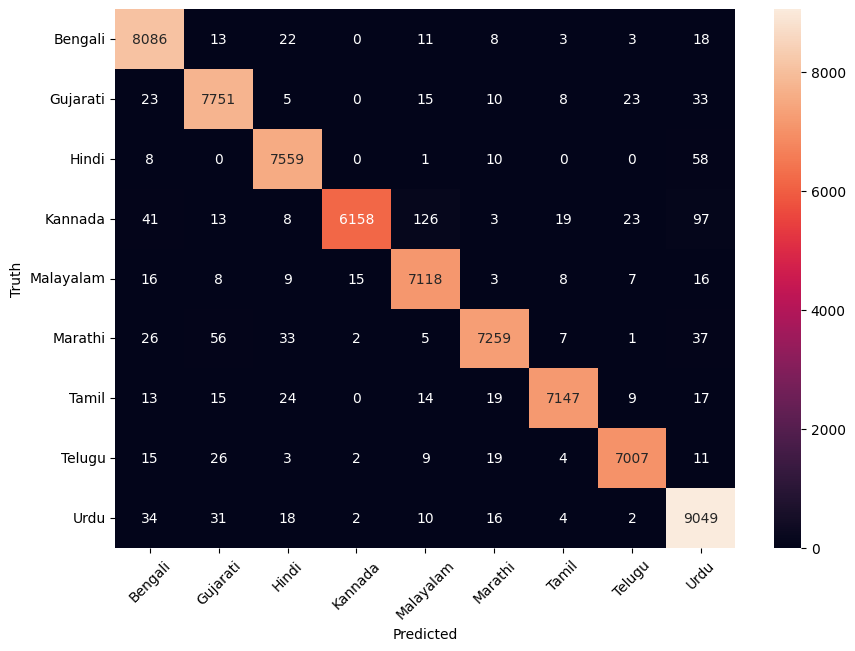

In [16]:
cm = confusion_matrix(y_test, random_forest_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(np.arange(0.5, 9.5), random_forest.classes_, rotation=45)
plt.yticks(np.arange(0.5, 9.5), random_forest.classes_, rotation=0)
plt.show()

In [19]:
with open('models/random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f)